<a href="https://colab.research.google.com/github/Anweshasen98/UAV-Object-Detection-Transfer-Learning_YOLOv8/blob/main/YOLOv3_Trained_Weights_For_Object_Detection_On_Test_Images.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **YOLOv3 Trained Weights For Object Detection On Test Images**

In [ ]:
import random
import os
import matplotlib.pyplot as plt
import cv2
import numpy as np


In [ ]:
#VIA GOOGLE DRIVE
%cd ..
from google.colab import drive
drive.mount('/content/gdrive')

/
Mounted at /content/gdrive


In [ ]:
# this creates a symbolic link so that now the path /content/gdrive/My\ Drive/ is equal to /mydrive
!ln -s /content/gdrive/My\ Drive/ /mydrive
#!ls /mydrive

ln: failed to create symbolic link '/mydrive/My Drive': File exists


In [ ]:
# Set the image directories
image_dir = "/content/gdrive/MyDrive/yolov4/test"
output_dir= "/content/gdrive/MyDrive/yolov4/output"

In [ ]:
image_files = os.listdir(image_dir)

for image_file in image_files:
    base_name, file_ext = os.path.splitext(image_file)

In [ ]:

## provide the path for testing data, config file and tained model form colab
net = cv2.dnn.readNet("/content/gdrive/MyDrive/yolov4/yolov3_custom2.cfg","/content/gdrive/MyDrive/yolov4/backup/yolov3_custom2_2000.weights")

classes=['drone']

# Create a list of all indices
indices = list(range(len(image_files)))


In [ ]:
counter = 0
#for index in indices:
for index in range (len(indices)):
    image_file = image_files[index]
    my_img = cv2.imread(os.path.join(image_dir,image_file))
    #plt.imshow(cv2.cvtColor(my_img, cv2.COLOR_BGR2RGB))
    #plt.show()

    height,width,_=my_img.shape

    blob=cv2.dnn.blobFromImage(my_img, 1/255, (416,416), (0,0,0), swapRB= True, crop=False )

    net.setInput(blob)

    last_layer = net.getUnconnectedOutLayersNames()
    layer_out=net.forward(last_layer)
    boxes=[]
    confidences=[]
    class_ids=[]

    for output in layer_out:
        for detection in output:
            score=detection[5:]
            class_id= np.argmax(score)
            confidence= score[class_id]
            if confidence > 0.1:
                center_x = int(detection[0] * width)
                center_y = int(detection[1] * height)
                w = int(detection[2] * width)
                h = int(detection[3]* height)
                x = int(center_x - w/2)
                y = int(center_y - h/2)

                boxes.append([x,y,w,h])
                confidences.append((float(confidence)))
                class_ids.append(class_id)

    indexes = cv2.dnn.NMSBoxes(boxes,confidences,.2,.1)
    font = cv2.FONT_HERSHEY_PLAIN
    colors = [[0, 0, 255]] * len(boxes) # Define the color as red in BGR format

    for i in indexes.flatten():
            x,y,w,h = boxes[i]
            label = str(classes[class_ids[i]])
            confidence = str(round(confidences[i],2))
            color = colors[i]

            cv2.rectangle(my_img, (x, y), (x+w, y+h), color, 2)
            cv2.putText(my_img,label + " " + confidence, (x,y+20),font,1,(0,0,0),2)

# display the image

    plt.imshow(cv2.cvtColor(my_img, cv2.COLOR_BGR2RGB))
    plt.show()

# Construct the new output file name
    #output_path = os.path.join(output_dir, image_file)
    #cv2.imwrite(output_path, my_img)


In [ ]:
# specify the path to the images
path= "/content/gdrive/MyDrive/yolov4/output"
images = os.listdir(path)

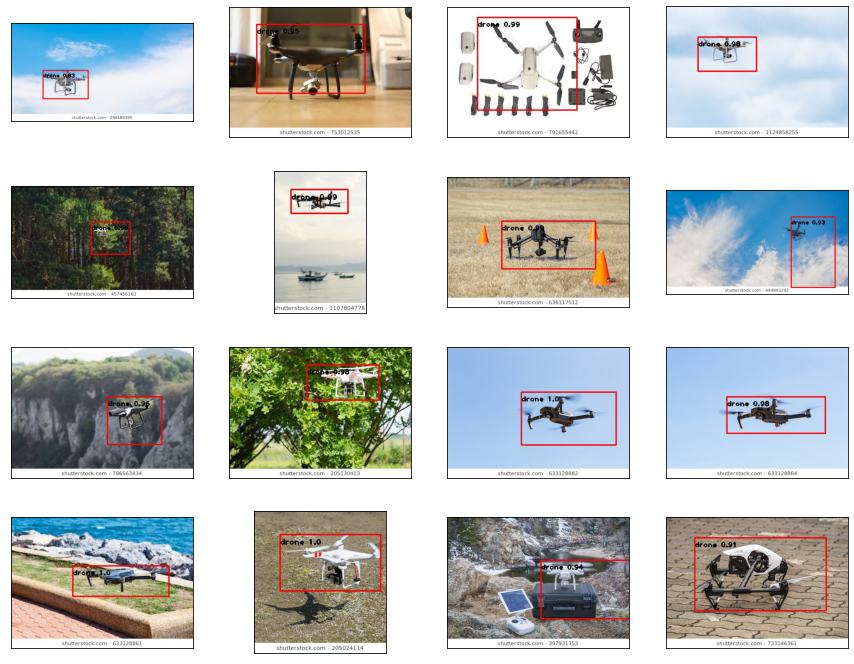

In [ ]:
import matplotlib.pyplot as plt

# plot the images in a  subplot
fig, ax = plt.subplots(4,4, figsize=(15, 12))
for i, axi in enumerate(ax.flat):
    img = plt.imread(os.path.join(path, images[i]))
    axi.imshow(img)
    axi.set_xticks([])
    axi.set_yticks([])

# display the plot
plt.show()


In [ ]:
#End of yolov3 on testing images